In [6]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
train_size = 90000
test_size = 1000

embed = pd.read_csv('../data/artificial3_10_200.csv', nrows=(train_size + test_size)).to_numpy()

In [3]:
X_embedded = TSNE(n_components=2, n_iter=2000, perplexity=40, verbose=2, random_state=23).fit_transform(embed)
# train = X_embedded[: 90000]
# test = X_embedded[90000: 90000 + 1000]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 91000 samples in 1.376s...
[t-SNE] Computed neighbors for 91000 samples in 359.979s...
[t-SNE] Computed conditional probabilities for sample 1000 / 91000
[t-SNE] Computed conditional probabilities for sample 2000 / 91000
[t-SNE] Computed conditional probabilities for sample 3000 / 91000
[t-SNE] Computed conditional probabilities for sample 4000 / 91000
[t-SNE] Computed conditional probabilities for sample 5000 / 91000
[t-SNE] Computed conditional probabilities for sample 6000 / 91000
[t-SNE] Computed conditional probabilities for sample 7000 / 91000
[t-SNE] Computed conditional probabilities for sample 8000 / 91000
[t-SNE] Computed conditional probabilities for sample 9000 / 91000
[t-SNE] Computed conditional probabilities for sample 10000 / 91000
[t-SNE] Computed conditional probabilities for sample 11000 / 91000
[t-SNE] Computed conditional probabilities for sample 12000 / 91000
[t-SNE] Computed conditional probabilities for 

[t-SNE] Iteration 950: error = 4.5474243, gradient norm = 0.0000350 (50 iterations in 85.665s)
[t-SNE] Iteration 1000: error = 4.5409412, gradient norm = 0.0000318 (50 iterations in 84.204s)
[t-SNE] Iteration 1050: error = 4.5352387, gradient norm = 0.0000294 (50 iterations in 84.152s)
[t-SNE] Iteration 1100: error = 4.5301967, gradient norm = 0.0000269 (50 iterations in 85.040s)
[t-SNE] Iteration 1150: error = 4.5257435, gradient norm = 0.0000248 (50 iterations in 83.129s)
[t-SNE] Iteration 1200: error = 4.5216279, gradient norm = 0.0000230 (50 iterations in 83.310s)
[t-SNE] Iteration 1250: error = 4.5178299, gradient norm = 0.0000215 (50 iterations in 86.676s)
[t-SNE] Iteration 1300: error = 4.5144920, gradient norm = 0.0000200 (50 iterations in 83.844s)
[t-SNE] Iteration 1350: error = 4.5113482, gradient norm = 0.0000188 (50 iterations in 86.413s)
[t-SNE] Iteration 1400: error = 4.5085444, gradient norm = 0.0000177 (50 iterations in 84.739s)
[t-SNE] Iteration 1450: error = 4.5058784

In [8]:
torch.save(X_embedded, '../data/t-sne-2000iters.pth.tar')

In [16]:
sample_size = 2000
perm = torch.randperm(X_embedded.shape[0])
idx = perm[:sample_size]
binary_idx = torch.tensor(train_size * [0] + (X_embedded.shape[0] - train_size) * [1])
X_embedded_sample = X_embedded[idx]
binary_idx_sample = binary_idx[idx]

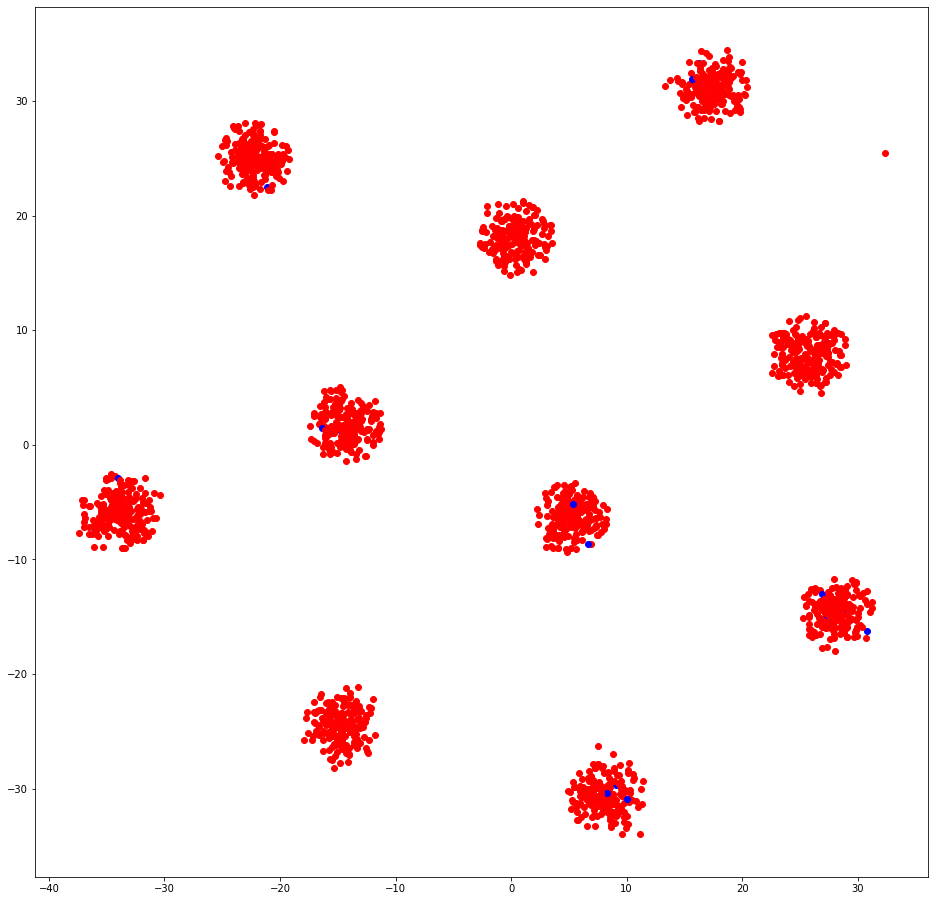

In [18]:

plt.figure(figsize=(16, 16)) 
for b, i in zip(binary_idx_sample, range(sample_size)):
    if b == 0:
        color = 'red'
        text = "Defect"
    else:
        color = 'blue'
        text = "Normal"
    plt.scatter(X_embedded_sample[i,0],X_embedded_sample[i,1], color=color)
    plt.annotate(None,
            xy=(X_embedded_sample[i,0],X_embedded_sample[i,1]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.savefig("visual.png")

In [5]:
embed.shape

(91000, 200)